# Denoising Diffusion Probabilistic Models: A Comprehensive Replication Study - Notebook 
<div style="text-align: center;">
02456 Deep Learning, DTU Compute, Autumn 2023

Adrian Valentin Kragh-Hillers (s201390), Christian Raasteen (s204148), Christoffer Wejendorp (s204090), and Jasmin Thari (s204155)
</div>


### Structure of this Notebook
The purpose of this notebook is to showcase the results we have achieved. To do so, we will load one of the three trained models of both MNIST and CIFAR10 and use it to generate sample images. Additionally, we will calculate the FID score for the trained model. You can find the loaded models by following this link: [here](https://drive.google.com/drive/folders/1VbaEI8oKG_uJuufF08dCE6yWTF4-urWj?usp=share_link) (please note that we couldn't include them in the git repository due to their large size). 

Furthermore, please keep in mind that we are unable to display the loss curve and FID score during training within the notebook. These metrics are calculated during training, which was performed on DTU's HPC system due to the substantial computational resources required by these models. 

## 0. Initialization

In [7]:
import os
from datetime import datetime as dt
import numpy as np
from matplotlib import pyplot as plt
import torch
import torch.nn as nn
from torch import optim
from pytorch_fid import fid_score
from tqdm import tqdm
import logging
import argparse

# Custom Modules
from utils import *
from modules import UNet
from DDPM import *

# 1. DDPM on the MNIST dataset

### 1.1 Load trained model

- First, we load one of the three trained models.

In [2]:
device = 'cpu'
model = UNet(c_in=1, c_out=1,img_dim=28,initial_feature_maps=64,num_max_pools=2).to(device)
ckpt = torch.load(f"models/mnist_model.pt", map_location=torch.device('cpu'))
model.load_state_dict(ckpt)

<All keys matched successfully>

### 1.2 Sampling new images using trained model

In [14]:
diffusion = DiffusionProcess(img_shape=(1,28,28), img_size=28)
x = diffusion.sampling(model, num_img= 10).to(device)

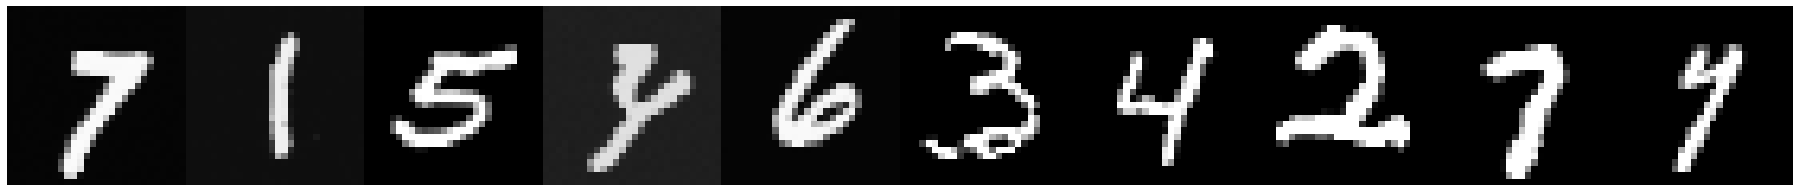

In [16]:
plot_images_gray_scale(x, fig_size=(32,32))

### 1.3 Calculating FID Score of the trained model
- The 2048 sampled images is runned on DTU's HPC using the `Calc_FID_2048.py` script. To illustrate here, we will load the 2048 generated images and calculate the FID score. 

In [27]:
path_to_sampled_images_mnist = 'sampled_images/MNIST_1'
path_to_real_images_mnist = 'real_images/MNIST_all_train_images_2048'
# Calculate FID score
fid_value_mnist = fid_score.calculate_fid_given_paths([path_to_sampled_images_mnist, path_to_real_images_mnist],batch_size=1, device=device, dims=2048)
print('FID Score of MNIST model : ', fid_value_mnist)

100%|██████████| 2048/2048 [24:33<00:00,  1.39it/s]   


FID Score of MNIST model :  10.739338901105867


# 2. DDPM on the CIFAR10 dataset

### 2.1 Load trained model

- First, we load one of the three trained models.

In [20]:
device = 'cpu'
model = UNet(c_in=3, c_out=3,img_dim=64,initial_feature_maps=64,num_max_pools=2).to(device)
ckpt = torch.load(f"models/cifar64_model.pt", map_location=torch.device('cpu'))
model.load_state_dict(ckpt)

<All keys matched successfully>

### 1.2 Sampling new images using trained model

In [23]:
diffusion = DiffusionProcess(img_shape=(3,64,64), img_size=64)
x = diffusion.sampling(model, num_img= 10).to(device)

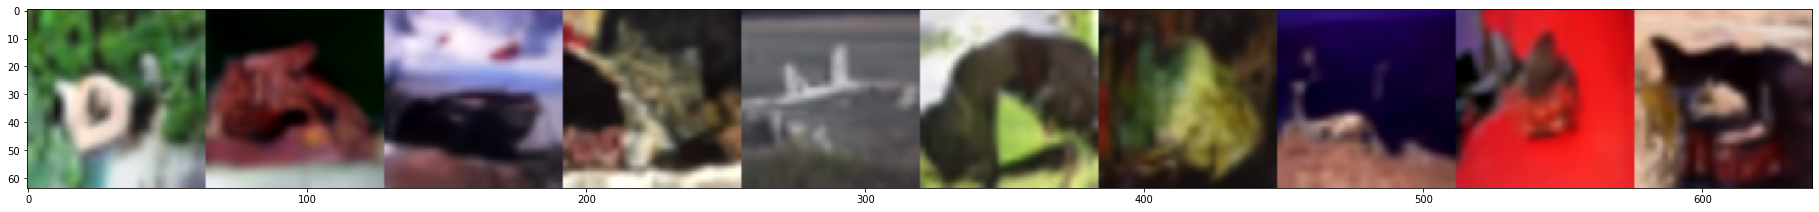

In [25]:
plot_images(x)

### 1.3 Calculating FID Score of the trained model
- The 2048 sampled images is runned on DTU's HPC using the `Calc_FID_2048.py` script. To illustrate here, we will load the 2048 generated images and calculate the FID score. 

In [ ]:
path_to_sampled_images_cifar = 'sampled_images/CIFAR64_1'
path_to_real_images_cifar = 'real_images/CIFAR10_all_train_images_64x64'
# Calculate FID score
fid_value_cifar = fid_score.calculate_fid_given_paths([path_to_sampled_images_cifar, path_to_real_images_cifar], batch_size=1, device=device, dims=2048)
print('FID Score of CIFAR10 64x64 model : ', fid_value_cifar)

In [26]:
import os
import random
import shutil

# Source folder with the images
source_folder =  'real_images/MNIST_all_train_images' 
# Destination folder to move the selected images
destination_folder =  'real_images/MNIST_all_train_images_2048'  # Replace 'path_to_destination_folder' with the desired destination folder path

# Ensure the destination folder exists, create it if necessary
if not os.path.exists(destination_folder):
    os.makedirs(destination_folder)

# List all .jpg files in the source folder
jpg_files = [f for f in os.listdir(source_folder) if f.endswith('.jpg')]

# Randomly select 2048 images
random_images = random.sample(jpg_files, 2048)

# Move the selected images to the destination folder
for image in random_images:
    source_path = os.path.join(source_folder, image)
    destination_path = os.path.join(destination_folder, image)
    shutil.move(source_path, destination_path)

print("2048 random images moved to the destination folder.")


2048 random images moved to the destination folder.
